In [1]:
!pip3 install opencv-python

In [2]:
import cv2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it

In [4]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

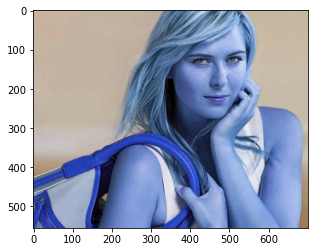

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

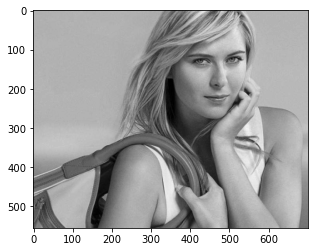

In [7]:
plt.imshow(gray,cmap="gray")

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
(x,y,w,h)

(352, 38, 233, 233)

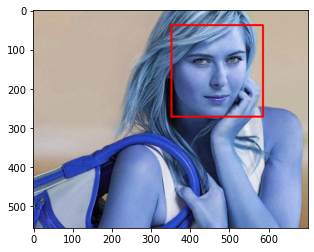

In [10]:
face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_image)

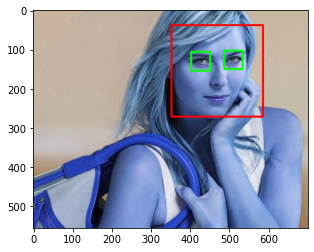

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
        
plt.figure()  
plt.imshow(face_img,cmap="gray")
plt.show()      

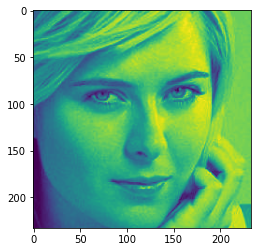

In [12]:
roi_gray = gray[y:y+h,x:x+w]
plt.imshow(roi_gray)

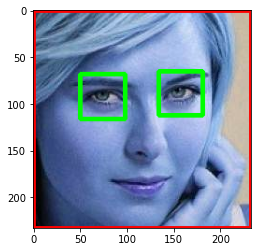

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
roi_color = face_img[y:y+h,x:x+w]
plt.imshow(roi_color)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color 

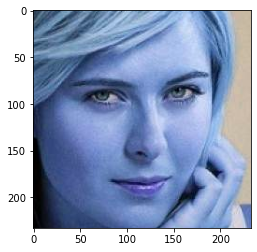

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

TypeError: Image data of dtype object cannot be converted to float

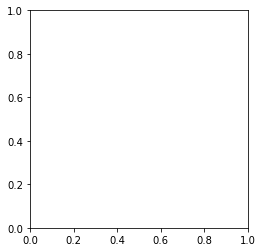

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
plt.imshow(cropped_image)

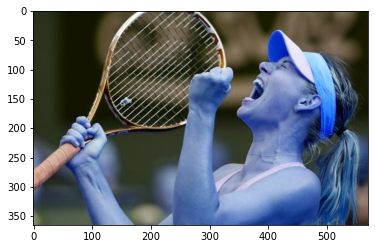

In [17]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [18]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

## For making the directory for cropped image
* import shutil
* if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
* os.mkdir(path_to_cr_data)    

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in  os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [22]:
print(celebrity_file_names_dict["lionel_messi"])

['./images_dataset/cropped/lionel_messi/lionel_messi1.png', './images_dataset/cropped/lionel_messi/lionel_messi2.png', './images_dataset/cropped/lionel_messi/lionel_messi3.png', './images_dataset/cropped/lionel_messi/lionel_messi4.png', './images_dataset/cropped/lionel_messi/lionel_messi5.png', './images_dataset/cropped/lionel_messi/lionel_messi6.png', './images_dataset/cropped/lionel_messi/lionel_messi7.png', './images_dataset/cropped/lionel_messi/lionel_messi8.png', './images_dataset/cropped/lionel_messi/lionel_messi9.png', './images_dataset/cropped/lionel_messi/lionel_messi10.png', './images_dataset/cropped/lionel_messi/lionel_messi11.png', './images_dataset/cropped/lionel_messi/lionel_messi12.png', './images_dataset/cropped/lionel_messi/lionel_messi13.png', './images_dataset/cropped/lionel_messi/lionel_messi14.png', './images_dataset/cropped/lionel_messi/lionel_messi15.png', './images_dataset/cropped/lionel_messi/lionel_messi16.png', './images_dataset/cropped/lionel_messi/lionel_me

In [23]:
len(celebrity_file_names_dict["lionel_messi"])

39

### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [24]:
for img_dir in cropped_image_dirs:
    print(img_dir)

./images_dataset/cropped/lionel_messi
./images_dataset/cropped/maria_sharapova
./images_dataset/cropped/roger_federer
./images_dataset/cropped/serena_williams
./images_dataset/cropped/virat_kohli


In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
    
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi22.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi23.png',
  './images_dataset/cropped/lionel_messi\\lionel_messi24.png',
  './images_dataset/cropped/lionel_messi\

In [26]:
len(celebrity_file_names_dict["lionel_messi"])

35

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1

class_dict    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

## Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

## Wavelet transform

In [28]:
!pip install PyWavelets

In [29]:
import numpy as np
import pywt
import cv2

def w2d(img,mode="harr",level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray) 
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H


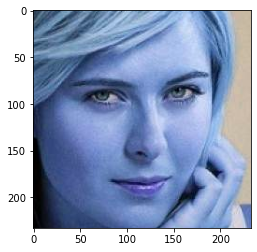

In [30]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

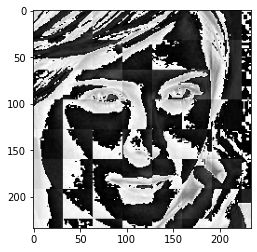

In [31]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [32]:
X,y = [],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,"db1",5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [33]:
len(X)

167

In [34]:
32*32*3 + 32*32

4096

In [35]:
len(X[0])

4096

In [36]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(167, 4096)

In [37]:
X

array([[100., 129., 140., ..., 237., 234., 232.],
       [ 14.,  13.,  15., ...,   9., 250., 250.],
       [ 25.,  33.,  34., ...,  14.,   6., 220.],
       ...,
       [250., 173., 135., ...,   9.,   4., 252.],
       [ 17.,  35.,  54., ...,  32.,  62., 199.],
       [227., 114.,  27., ..., 245.,   1.,  51.]])

In [38]:
len(y)

167

In [39]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

## Data Cleaning Process in done.Now we are ready to train our model.
We will use SVM with rbf kernel tuned with heuristic finetuning

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8809523809523809

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.90      0.90      0.90        10
           2       0.71      0.83      0.77         6
           3       1.00      1.00      1.00         8
           4       0.85      1.00      0.92        11

    accuracy                           0.88        42
   macro avg       0.89      0.86      0.86        42
weighted avg       0.90      0.88      0.88        42



## Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.816,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.640,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.848,{'logisticregression__C': 1}


In [46]:
best_estimators['svm'].score(X_test,y_test)

0.9761904761904762

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9761904761904762

In [49]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  5,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

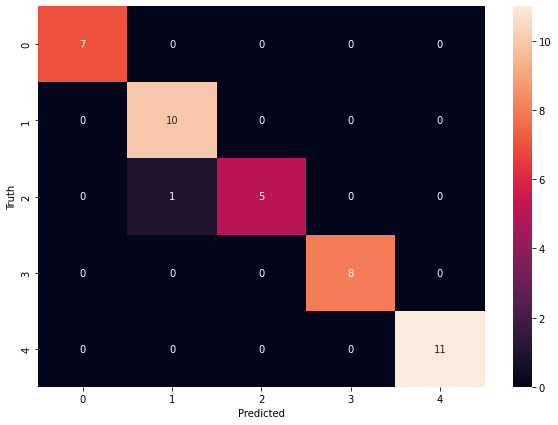

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the trained Model

In [52]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## Save class dictionary

In [54]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))